1. How is the ROI?
2. How are the donors helping with action + results?
3. What insights are there to show?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
service_app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/service_app.csv')
service_app.columns

Index(['Id', 'RecordType', 'CreatedDate', 'Account', 'Area_Median_Income',
       'County2', 'Current_Program_Operating_Budget_Amount',
       'Date_of_Application', 'Date_of_Closure', 'Drivers_Licence_ID',
       'Female_Head_of_Household', 'Insurance', 'Lead_Test',
       'Monthly_Mortgage_Payment', 'Monthly_Utility_Bills', 'Mortgage_Current',
       'Mortgage', 'Most_Recent_Completed_Project_Date', 'Move_in_Year',
       'Number_of_Projects_Closed', 'Number_of_Projects_in_Progress',
       'Program_Eligibility2', 'Proof_of_Annual_Income', 'Proof_of_Ownership',
       'Property_Taxes_Current', 'Reason', 'Renovate_Right_Form',
       'Service_Area', 'Status', 'Type_of_House', 'Year_Built',
       'Child_Residents', 'Disabled_Residents', 'Elderly_Residents2',
       'Female_Residents', 'Male_Residents', 'Post_Healthy_Housing_Score',
       'Pre_Healthy_Housing_Score', 'Residents', 'Total_Changes_Made',
       'Total_Household_Annual_Income', 'Veteran_Residents', 'Severity_Scope',
     

In [ ]:
impact_summary = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/impact_summary.csv')
impact_summary.head()

,Name,CreatedDate,Service_Application,Post_Assessment_Date,Post,Pre_Assessment_Date,Pre,Priority_Rank,Priority_Name,Impact_Category
0,IS-00563,2019-03-12 17:18:00,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,1,Safe ingress/egress,Falls Prevention
1,IS-00564,2019-03-12 17:18:27,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,2,Roof watertight,Home Preservation
2,IS-00565,2019-03-12 17:18:54,service_app_15,NaN,Yes,2019-03-08 00:00:00,No,3,Runoff diverted,Home Preservation
3,IS-00566,2019-03-12 17:19:48,service_app_15,NaN,No,2019-03-08 00:00:00,No,4,No gaps/cracks/holes,Energy Efficiency
4,IS-00567,2019-03-12 17:20:21,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,5,Doors/windows secure,Energy Efficiency


In [ ]:
campaigns = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/optional_relevance/campaigns.csv')
campaigns.columns

Index(['Id', 'Type', 'RecordType', 'Status', 'StartDate', 'EndDate',
       'ExpectedRevenue', 'BudgetedCost', 'ActualCost', 'ExpectedResponse',
       'NumberSent', 'IsActive', 'NumberOfContacts', 'NumberOfResponses',
       'NumberOfOpportunities', 'NumberOfWonOpportunities',
       'AmountAllOpportunities', 'AmountWonOpportunities',
       'HierarchyNumberOfContacts', 'HierarchyNumberOfResponses',
       'HierarchyNumberOfOpportunities', 'HierarchyNumberOfWonOpportunities',
       'HierarchyAmountAllOpportunities', 'HierarchyAmountWonOpportunities',
       'HierarchyNumberSent', 'HierarchyExpectedRevenue',
       'HierarchyBudgetedCost', 'HierarchyActualCost', 'CreatedDate',
       'GW_Volunteers__Number_of_Volunteers',
       'GW_Volunteers__Volunteer_Completed_Hours',
       'GW_Volunteers__Volunteer_Jobs', 'GW_Volunteers__Volunteer_Shifts',
       'GW_Volunteers__Volunteers_Still_Needed', 'Administrative_Cost',
       'Cost_of_Materials', 'Homeowner_Completion_Signed',
       'Ho

In [ ]:
submissions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/optional_relevance/submissions.csv')
submissions.columns

Index(['Id', 'RecordType', 'CreatedDate', 'City', 'Has_Insurance',
       'Home_Owned_and_Occupied', 'Homeowner_Application_Female_HoH',
       'Service_Application', 'How_did_you_hear_about_us', 'Language_Spoken',
       'Lead_Status', 'Number_of_Residents', 'Relationship_to_Homeowner',
       'Repair_Areas', 'Resident_Demographics', 'State',
       'Taxes_and_Mortgage_Current', 'Total_Annual_Household_Income',
       'Type_of_Home', 'Volunteer_Availability', 'Volunteer_Interest',
       'Year_Built', 'Zip'],
      dtype='object')

In [ ]:
area_median_income = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/area_median_income.csv')
area_median_income.head()

,Id,CreatedDate,AMI_Name,County,Extremely_Low_Income_Limit,Fiscal_Year,Low_Income_Limit,Number_of_Residents,Very_Low_Income_Limit,Active
0,area_median_income_0,2018-08-06 20:59:22,Davidson - FY18-19 - 1 Residents,Davidson,15750,FY18-19,41950,1,26250,0
1,area_median_income_1,2018-08-06 20:59:59,Davidson - FY18-19 - 2 Residents,Davidson,18000,FY18-19,47950,2,30000,0
2,area_median_income_2,2018-08-06 21:01:24,Davidson - FY18-19 - 3 Residents,Davidson,20780,FY18-19,53950,3,33750,0
3,area_median_income_3,2018-08-06 21:02:07,Davidson - FY18-19 - 4 Residents,Davidson,25100,FY18-19,59900,4,37450,0
4,area_median_income_4,2018-08-06 21:02:43,Davidson - FY18-19 - 5 Residents,Davidson,29420,FY18-19,64700,5,40450,0


In [ ]:
contractor_bid= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/contractor_bid.csv')
contractor_bid.head()

,Id,CreatedDate,Project,Amount,Bid_Date,Bid_Date_2,Status,Warranty_Included,Estimated_Completion_Date,Service_Application
0,contractor_bid_0,2023-01-30 20:40:28,project_1,38000.0,2022-10-14 00:00:00,2022-12-20 00:00:00,Selected,1,2022-12-22 00:00:00,NaN
1,contractor_bid_1,2021-07-26 19:09:50,NaN,400.0,2021-07-06 00:00:00,NaN,Closed - Won,0,NaN,NaN
2,contractor_bid_2,2021-07-27 16:26:43,NaN,2250.0,2021-07-15 00:00:00,NaN,Selected,1,NaN,NaN
3,contractor_bid_3,2021-07-27 16:35:39,NaN,12830.0,2021-07-20 00:00:00,NaN,Selected,1,NaN,NaN
4,contractor_bid_4,2021-07-27 19:10:28,NaN,NaN,NaN,NaN,Work Complete,1,NaN,NaN


In [ ]:
homeowner_survey = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/homeowner_survey.csv')
homeowner_survey.head()

,CreatedDate,X3a,X1a,X1b,X4a,X2b,X4b,X2a,X5b,X5a,Date_Received,Contact,X3b,Service_Application
0,2023-04-18 15:39:07,Just able to pay but not much more,Always or almost always,Rarely,Always or almost always,High chance,Rarely,High chance,I am confident I will stay in my home for as l...,I was worried that I might have to leave my ho...,NaN,0034M000020cM5mQAE,Just able to pay but not much more,service_app_145
1,2023-06-16 20:11:02,Just able to pay but not much more,Always or almost always,Never or almost never,Sometimes,No chance,Never or almost always,Not sure,I am confident I will stay in my home for as l...,Not sure,2023-02-13 00:00:00,NaN,Just able to pay but not much more,service_app_101
2,2021-09-03 21:36:27,Comfortably able to pay and more,Always or almost always,Rarely,Sometimes,No chance,Rarely,Low chance,I am confident I will stay in my home for as l...,I was confident I would stay in my home for as...,2021-08-27 00:00:00,0034M000021Lu2uQAC,Comfortably able to pay and more,service_app_158
3,2021-12-07 16:19:46,Barely able to pay,Never or almost never,Never or almost never,Always or almost always,Low chance,Sometimes,Moderate chance,I am confident I will stay in my home for as l...,Not sure,2021-12-07 00:00:00,0034M000021LtJGQA0,Barely able to pay,service_app_157
4,2021-12-07 16:21:27,Barely able to pay,Often,Rarely,Always or almost always,No chance,Sometimes,High chance,I am confident I will stay in my home for as l...,"I felt secure at the time, but I was uncertain...",2021-12-07 00:00:00,0034M000025DCGyQAO,Just able to pay but not much more,service_app_161


In [ ]:
impact_summary=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/impact_summary.csv')
impact_summary.head()

,Name,CreatedDate,Service_Application,Post_Assessment_Date,Post,Pre_Assessment_Date,Pre,Priority_Rank,Priority_Name,Impact_Category
0,IS-00563,2019-03-12 17:18:00,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,1,Safe ingress/egress,Falls Prevention
1,IS-00564,2019-03-12 17:18:27,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,2,Roof watertight,Home Preservation
2,IS-00565,2019-03-12 17:18:54,service_app_15,NaN,Yes,2019-03-08 00:00:00,No,3,Runoff diverted,Home Preservation
3,IS-00566,2019-03-12 17:19:48,service_app_15,NaN,No,2019-03-08 00:00:00,No,4,No gaps/cracks/holes,Energy Efficiency
4,IS-00567,2019-03-12 17:20:21,service_app_15,NaN,Yes,2019-03-08 00:00:00,Yes,5,Doors/windows secure,Energy Efficiency


In [ ]:
project_cost = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/project_cost.csv')
project_cost.head()

,Id,Name,CreatedDate,Project,Amount,Service_Application,Category,Contractor_Bid
0,project_cost_0,Cost-0000,2022-12-05 17:38:42,project_0,5000.00,service_app_161,NaN,contractor_bid_5
1,project_cost_1,Cost-0001,2022-12-05 17:40:38,project_0,500.00,service_app_161,Materials,NaN
2,project_cost_2,Cost-0002,2023-01-30 20:40:30,project_1,38000.00,service_app_101,NaN,contractor_bid_0
3,project_cost_3,Cost-0003,2025-02-11 16:38:46,project_2,1214.61,service_app_235,Materials,NaN
4,project_cost_4,Cost-0005,2025-02-11 16:41:54,project_2,3000.00,service_app_235,NaN,contractor_bid_15


In [ ]:
repairs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/Service Application Data/repairs.csv')
repairs.head()

,Id,CreatedDate,Service_Application,Number_of_Repairs,Project,Repair_Activity,Repair_Area,Status,Contractor_Bid,Priority,Quick_Notes,Repair_Cost
0,repair_0,2018-04-11 21:34:59,service_app_33,NaN,NaN,Replacement,Roof,Assigned,NaN,NaN,NaN,NaN
1,repair_1,2021-07-21 16:05:25,service_app_129,1.0,NaN,NaN,Appliances,Assigned,NaN,Medium,Kitchen vent hood cleaned,NaN
2,repair_2,2021-07-21 16:08:04,service_app_129,1.0,NaN,Repair,HVAC,Assigned,NaN,Low,Thermostat,NaN
3,repair_3,2021-07-21 21:37:02,service_app_158,6.0,NaN,NaN,Bathroom,Work Completed,contractor_bid_3,High,"Renovate bathroom to include a walk-in shower,...",NaN
4,repair_4,2021-07-21 21:38:16,service_app_158,1.0,NaN,Test,Lead Safety,Work Completed,contractor_bid_1,Critical,Lead paint inspection completed,NaN


In [ ]:
IRSIncomeByZipCode = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rebuilding hackathon/IRSIncomeByZipCode.csv')
IRSIncomeByZipCode.head()

,index,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


In [ ]:
# annual report data frame
columns= [ "Year", "Median Annual Household Income", "Total Volunteers",
          "Median Repair Cost of Each Home", "Volunteer Hours", "Median Age of Houses Repaired",
           "Value of Volunteer Hours", "Total Homes Repaired"]

annual_reports = pd.DataFrame(columns=columns)

rows = [
    {"Year" : '2019', "Median Annual Household Income" : 26200, "Total Volunteers" : 195,
     "Median Repair Cost of Each Home": 11200, "Volunteer Hours": 1070,
     "Median Age of Houses Repaired": 60, "Value of Volunteer Hours": 27210,
     "Total Homes Repaired": 24},
    {"Year" : '2020', "Median Annual Household Income" : 28831, "Total Volunteers" : 60,
     "Median Repair Cost of Each Home": 19034, "Volunteer Hours": 372,
     "Median Age of Houses Repaired": 50, "Value of Volunteer Hours": 10118,
     "Total Homes Repaired": 15},
    {"Year" : '2021', "Median Annual Household Income" : 36772, "Total Volunteers" : 85,
     "Median Repair Cost of Each Home": 21141, "Volunteer Hours": 414,
     "Median Age of Houses Repaired": 60, "Value of Volunteer Hours": 11816,
     "Total Homes Repaired": 29},
    {"Year" : '2022', "Median Annual Household Income" : 24982, "Total Volunteers" : 85,
     "Median Repair Cost of Each Home": 23807, "Volunteer Hours": 299,
     "Median Age of Houses Repaired": 60, "Value of Volunteer Hours": 7780,
     "Total Homes Repaired": 22},
    {"Year" : '2023', "Median Annual Household Income" : 35793, "Total Volunteers" : 118,
     "Median Repair Cost of Each Home": 27309, "Volunteer Hours": 516,
     "Median Age of Houses Repaired": 54, "Value of Volunteer Hours": 12857,
     "Total Homes Repaired": 22},
    {"Year" : '2024', "Median Annual Household Income" : 38768, "Total Volunteers" : 129,
     "Median Repair Cost of Each Home": 25167, "Volunteer Hours": 605,
     "Median Age of Houses Repaired": 58, "Value of Volunteer Hours": 20261,
     "Total Homes Repaired": 39}
]
annual_reports = pd.concat([annual_reports, pd.DataFrame(rows)], ignore_index=True)


In [ ]:
annual_reports

,Year,Median Annual Household Income,Total Volunteers,Median Repair Cost of Each Home,Volunteer Hours,Median Age of Houses Repaired,Value of Volunteer Hours,Total Homes Repaired
0,2019,26200,195,11200,1070,60,27210,24
1,2020,28831,60,19034,372,50,10118,15
2,2021,36772,85,21141,414,60,11816,29
3,2022,24982,85,23807,299,60,7780,22
4,2023,35793,118,27309,516,54,12857,22
5,2024,38768,129,25167,605,58,20261,39


poverty rate
average income in area
census

In [ ]:
demographic_groups = service_app[['Child_Residents', 'Disabled_Residents', 'Elderly_Residents2', 'Veteran_Residents', 'Female_Residents', 'Male_Residents']]
demographic_groups['Total Residents'] = demographic_groups['Female_Residents'].sum() + demographic_groups['Male_Residents'].sum()
demographic_groups.head()

/tmp/ipython-input-3769980982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_groups['Total Residents'] = demographic_groups['Female_Residents'].sum() + demographic_groups['Male_Residents'].sum()


,Child_Residents,Disabled_Residents,Elderly_Residents2,Veteran_Residents,Female_Residents,Male_Residents,Total Residents
0,0,0,1,0,1,0,498
1,0,0,1,0,1,0,498
2,0,0,2,0,1,1,498
3,0,0,0,0,1,1,498
4,0,0,1,0,2,0,498


In [ ]:
demographic_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Residents           345 non-null    int64
 1   Child_Residents     345 non-null    int64
 2   Disabled_Residents  345 non-null    int64
 3   Elderly_Residents2  345 non-null    int64
 4   Veteran_Residents   345 non-null    int64
 5   Female_Residents    345 non-null    int64
 6   Male_Residents      345 non-null    int64
dtypes: int64(7)
memory usage: 19.0 KB


In [ ]:
sum(demographic_groups.Residents)

524

In [ ]:
sum(demographic_groups)

In [ ]:
# getting demographic groups
service_app = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/service_app.csv')
demographic_groups = service_app[['Residents','Child_Residents', 'Disabled_Residents', 'Elderly_Residents2', 'Veteran_Residents', 'Female_Residents', 'Male_Residents']]

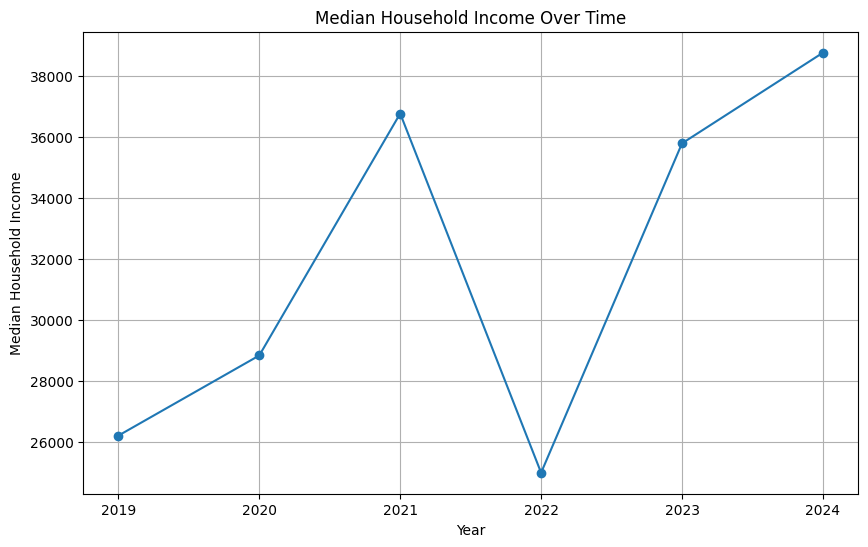

In [ ]:
# plot annual_reports line chart over time (years) for median household income
plt.figure(figsize=(10, 6))
plt.plot(annual_reports['Year'], annual_reports['Median Annual Household Income'], marker='o')
plt.title('Median Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income')
plt.grid(True)

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

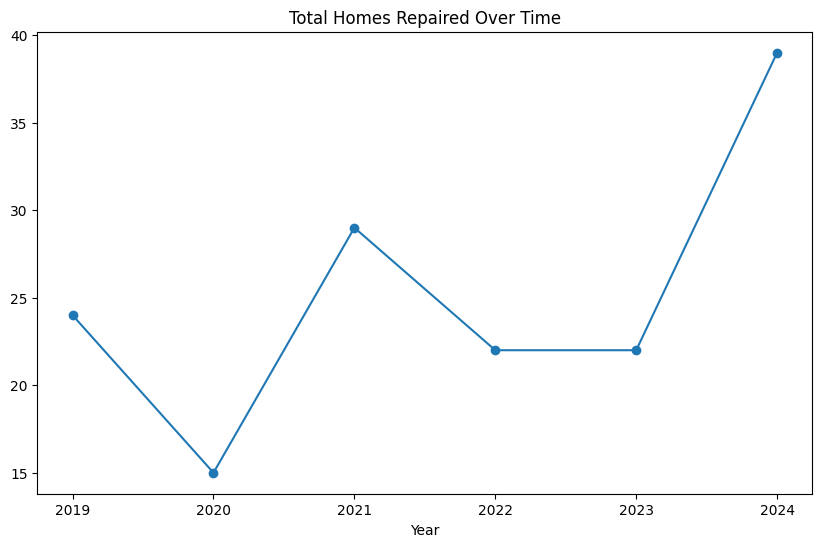

In [ ]:
# plot annual_reports line chart over time (years) for houses repaired
plt.figure(figsize=(10, 6))
plt.plot(annual_reports['Year'], annual_reports['Total Homes Repaired'], marker='o')
plt.title('Total Homes Repaired Over Time')
plt.xlabel('Year')
plt.ylabel

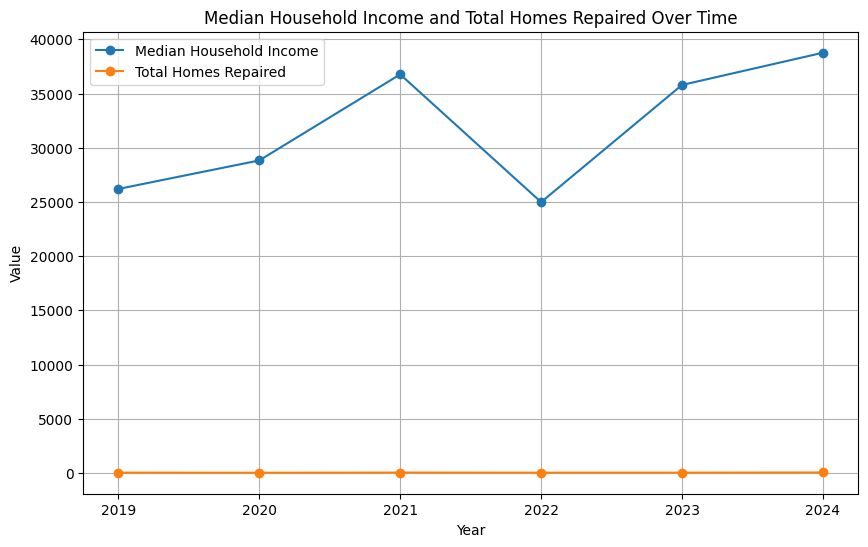

In [ ]:
# plot annual_reports line chart over time (years) for median household income & total homes repaired
plt.figure(figsize=(10, 6))
plt.plot(annual_reports['Year'], annual_reports['Median Annual Household Income'], marker='o', label='Median Household Income')
plt.plot(annual_reports['Year'], annual_reports['Total Homes Repaired'], marker='o', label='Total Homes Repaired')
plt.title('Median Household Income and Total Homes Repaired Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

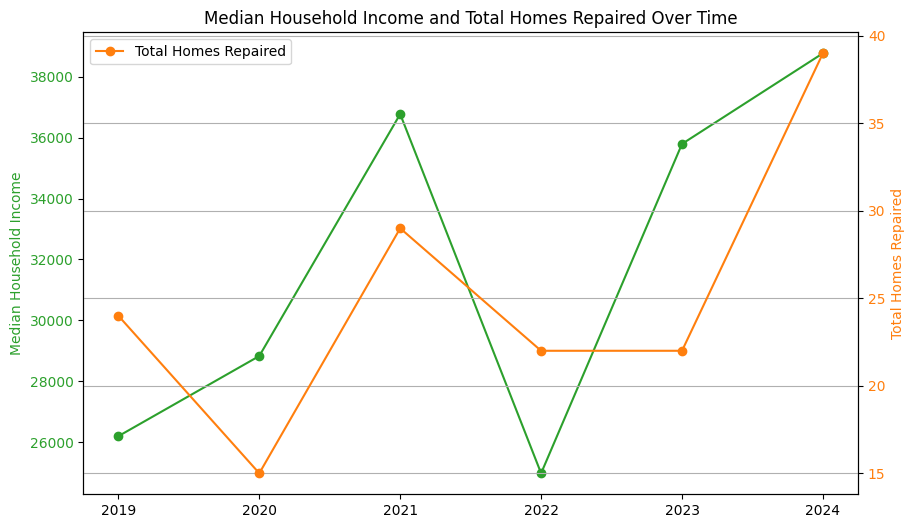

In [ ]:
# plot annual_reports with two scales line chart over time (years) for median household income and houses repaired
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
ax1.plot(annual_reports['Year'], annual_reports['Median Annual Household Income'], marker='o', label='Median Household Income', color ='tab:green')
ax1.set_ylabel('Median Household Income', color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax2 = ax1.twinx()
ax2.plot(annual_reports['Year'], annual_reports['Total Homes Repaired'], marker='o', label='Total Homes Repaired', color='tab:orange')
ax2.set_ylabel('Total Homes Repaired', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.title('Median Household Income and Total Homes Repaired Over Time')
plt.xlabel('Year')
plt.legend()
plt.grid(True)


In [ ]:
campaigns.head()

,Id,Type,RecordType,Status,StartDate,EndDate,ExpectedRevenue,BudgetedCost,ActualCost,ExpectedResponse,...,Skilled_Volunteer_Hours_Completed,Unskilled_Volunteer_Hours_Completed,MV_Skilled_Volunteers_at_Close,MV_Unskilled_Volunteers_at_Close,MV_Volunteers_at_Close,Sponsored_Volunteers_Expected,Total_Sponsorship_Amount,Project_Costs,Total_Amount_Paid,Total_Remaining_Balance_Owed
0,7011K000000vfrbQAA,Project,Project,Work Complete,2019-04-15 00:00:00,NaN,NaN,NaN,NaN,0,...,7.0,70.0,NaN,NaN,NaN,8.0,2500.00,0.0,0.0,0.0
1,7011K000000vhzNQAQ,Project,Project,Work Complete,2019-01-11 00:00:00,2019-01-11 00:00:00,NaN,NaN,NaN,0,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,7011K000000vhzSQAQ,Project,Project,Work Complete,2019-03-15 00:00:00,2019-03-15 00:00:00,NaN,NaN,NaN,0,...,0.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,7011K000000vi1EQAQ,Project,Project,Work Complete,2019-02-10 00:00:00,2019-02-10 00:00:00,NaN,NaN,NaN,0,...,275.0,215.0,NaN,NaN,NaN,NaN,17292.89,0.0,0.0,0.0
4,7011K000000vi1nQAA,Project,Project,Work Complete,2019-04-05 00:00:00,2019-04-05 00:00:00,NaN,NaN,NaN,0,...,0.0,29.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [130]:
campaigns["year"] = pd.to_datetime(campaigns["StartDate"]).dt.year

In [ ]:
campaigns.Status.value_counts()

,count
Status,
Closed,196
In Progress,96
Work Complete,57
Planning,36
Assigned,3
Ready for Build,1
Documentation Complete,1
Awaiting Available Funds,1
Canceled,1


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

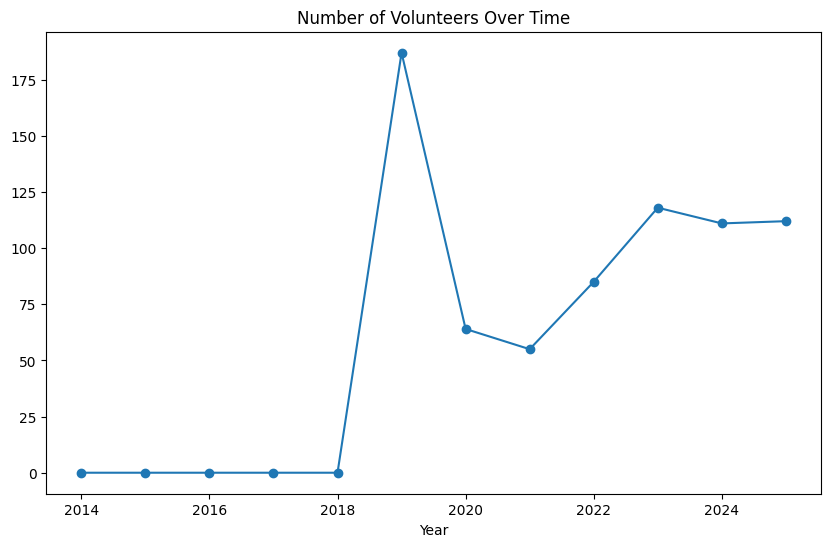

In [134]:
# line chart of year and number of volunteers sum per year
plt.figure(figsize=(10, 6))
plt.plot(campaigns.groupby('year')['GW_Volunteers__Number_of_Volunteers'].sum(), marker='o')
plt.title('Number of Volunteers Over Time')
plt.xlabel('Year')
plt.ylabel

In [ ]:
volunteers = campaigns[['GW_Volunteers__Number_of_Volunteers',
       'GW_Volunteers__Volunteer_Completed_Hours',
       'Number_of_Skilled_Volunteers', 'Number_of_Unskilled_Volunteers',
       'Skilled_Volunteer_Hours_Completed',
       'Unskilled_Volunteer_Hours_Completed', 'StartDate', 'EndDate']]
volunteers = volunteers.dropna(subset=['EndDate'])
volunteers['StartDate'] = pd.to_datetime(volunteers['StartDate'])
volunteers['EndDate'] = pd.to_datetime(volunteers['EndDate'])
volunteers['Duration_Days'] = (volunteers['EndDate'] - volunteers['StartDate']).dt.days

# looking into the more volunteers, shorter project time? if there is correlation between the two.
# pointing towards possibly looking into more volunteer partnerships that can reduce
# costs by increasing efficiency. + tapping into community

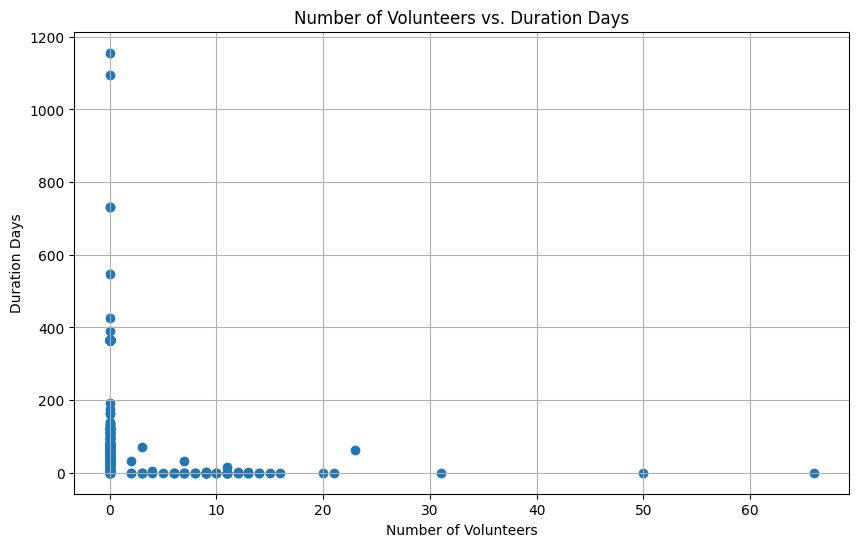

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(volunteers['GW_Volunteers__Number_of_Volunteers'], volunteers['Duration_Days'])
plt.title('Number of Volunteers vs. Duration Days')
plt.xlabel('Number of Volunteers')
plt.ylabel('Duration Days')
plt.grid(True)

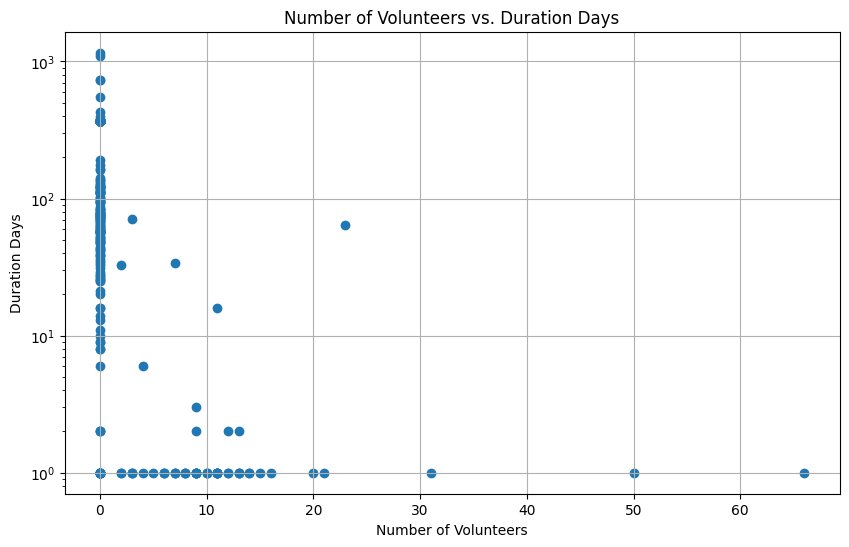

In [ ]:
# plot number of volunteers and duration days
plt.figure(figsize=(10, 6))
volunteers['Duration_Days_adj'] = volunteers['Duration_Days'] + 1
plt.scatter(volunteers['GW_Volunteers__Number_of_Volunteers'], volunteers['Duration_Days_adj'])
plt.yscale('log')
plt.title('Number of Volunteers vs. Duration Days')
plt.xlabel('Number of Volunteers')
plt.ylabel('Duration Days')
plt.grid(True)



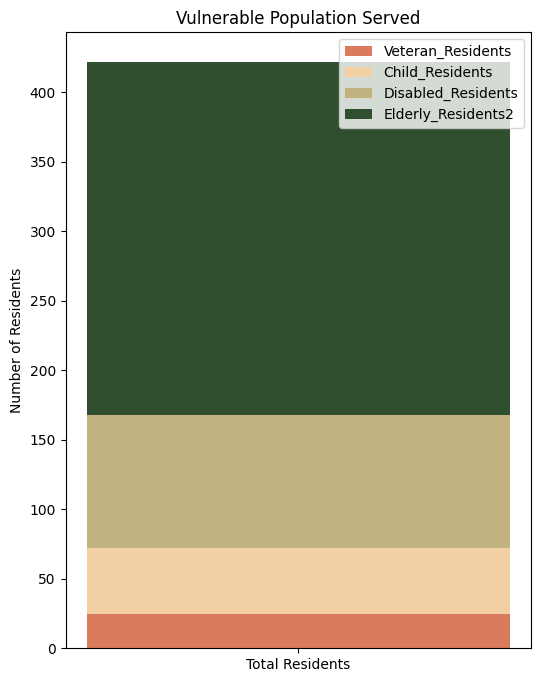

In [ ]:
import matplotlib.cm as cm
# stacked bar chart with demographics per category
totals = demographic_groups[['Child_Residents',
                             'Elderly_Residents2',
                             'Disabled_Residents',
                             'Veteran_Residents']].sum()

# Sort from greatest to least
totals = totals.sort_values(ascending=True)

retro_colors = ['#D97B5C',  # muted orange
                '#F2D0A4',  # cream
                '#C2B280',  # tan / dull yellow
                '#2F4F2F']  # green

plt.figure(figsize=(6, 8))
bottom = 0

for (col, value), color in zip(totals.items(), retro_colors):
    plt.bar('Total Residents', value, bottom=bottom, label=col, color=color)
    bottom += value


plt.ylabel('Number of Residents')
plt.title('Vulnerable Population Served')
plt.legend()
plt.show()

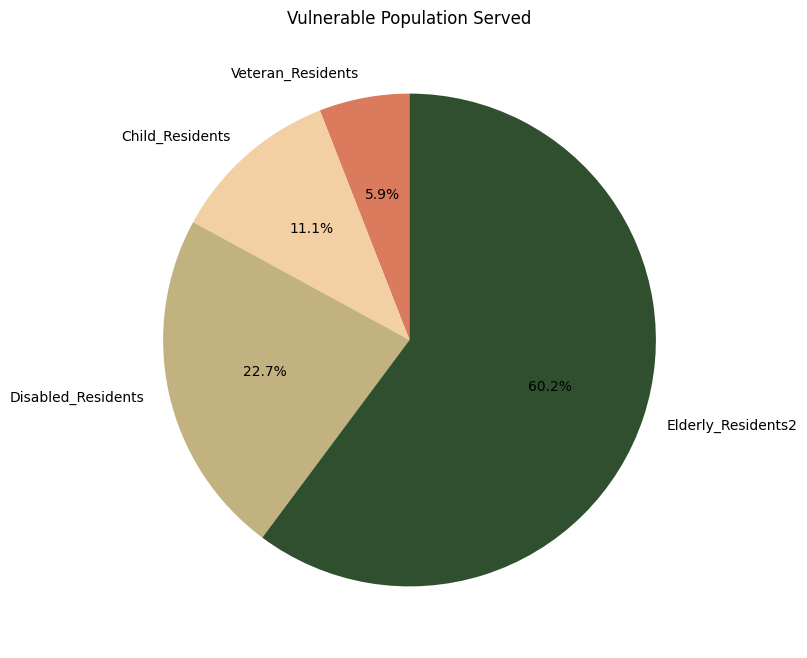

In [ ]:
import matplotlib.pyplot as plt

# Sum and sort your demographic groups (same as before)
totals = demographic_groups[['Child_Residents',
                             'Elderly_Residents2',
                             'Disabled_Residents',
                             'Veteran_Residents']].sum()

# Sort ascending or descending (optional, for color alignment)
totals = totals.sort_values(ascending=True)

# Retro color palette
retro_colors = ['#D97B5C',  # muted orange
                '#F2D0A4',  # cream
                '#C2B280',  # tan / dull yellow
                '#2F4F2F']  # green

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=90, colors=retro_colors)
plt.title('Vulnerable Population Served')
plt.show()


In [ ]:
demographic_groups['Total Residents'].sum()

np.int64(498)

In [ ]:
sum(demographic_groups[['Child_Residents',
                             'Elderly_Residents2',
                             'Disabled_Residents',
                             'Veteran_Residents']].sum())

422

In [ ]:
sum(demographic_groups['Female_Residents'] + demographic_groups['Male_Residents'])

498

In [ ]:
total_residents = demographic_groups['Female_Residents'].sum() + demographic_groups['Male_Residents'].sum()
print(total_residents)


498


In [ ]:
# look at sum of Total homes repaired in annual reports
annual_reports['Total Homes Repaired'].sum()


151

In [ ]:
demographic_groups

,Child_Residents,Disabled_Residents,Elderly_Residents2,Veteran_Residents,Female_Residents,Male_Residents,Total Residents
0,0,0,1,0,1,0,498
1,0,0,1,0,1,0,498
2,0,0,2,0,1,1,498
3,0,0,0,0,1,1,498
4,0,0,1,0,2,0,498
...,...,...,...,...,...,...,...
340,0,0,1,0,1,0,498
341,0,1,0,0,1,0,498
342,0,0,1,0,1,0,498
343,0,0,1,0,1,0,498
